In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [2]:
data = pd.read_csv('house.csv')


In [3]:
print(data.info())  
print(data.describe())  
print(data.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB
None
            Price     Bedroom        Space        Room         Lot  \
count  156.000000  156.000000   146.000000  156.000000  146.000000   
mean    56.474359    3.166667  1097.246575    6.500000   32.808219   
std     12.875307    1.348037   462.540698    1.675247    8.457859   
min     32.000000    1.000000   539.000000    4.000000   24.000000   
25%     46.000000    2.000000   805.250000    5.000000   25.

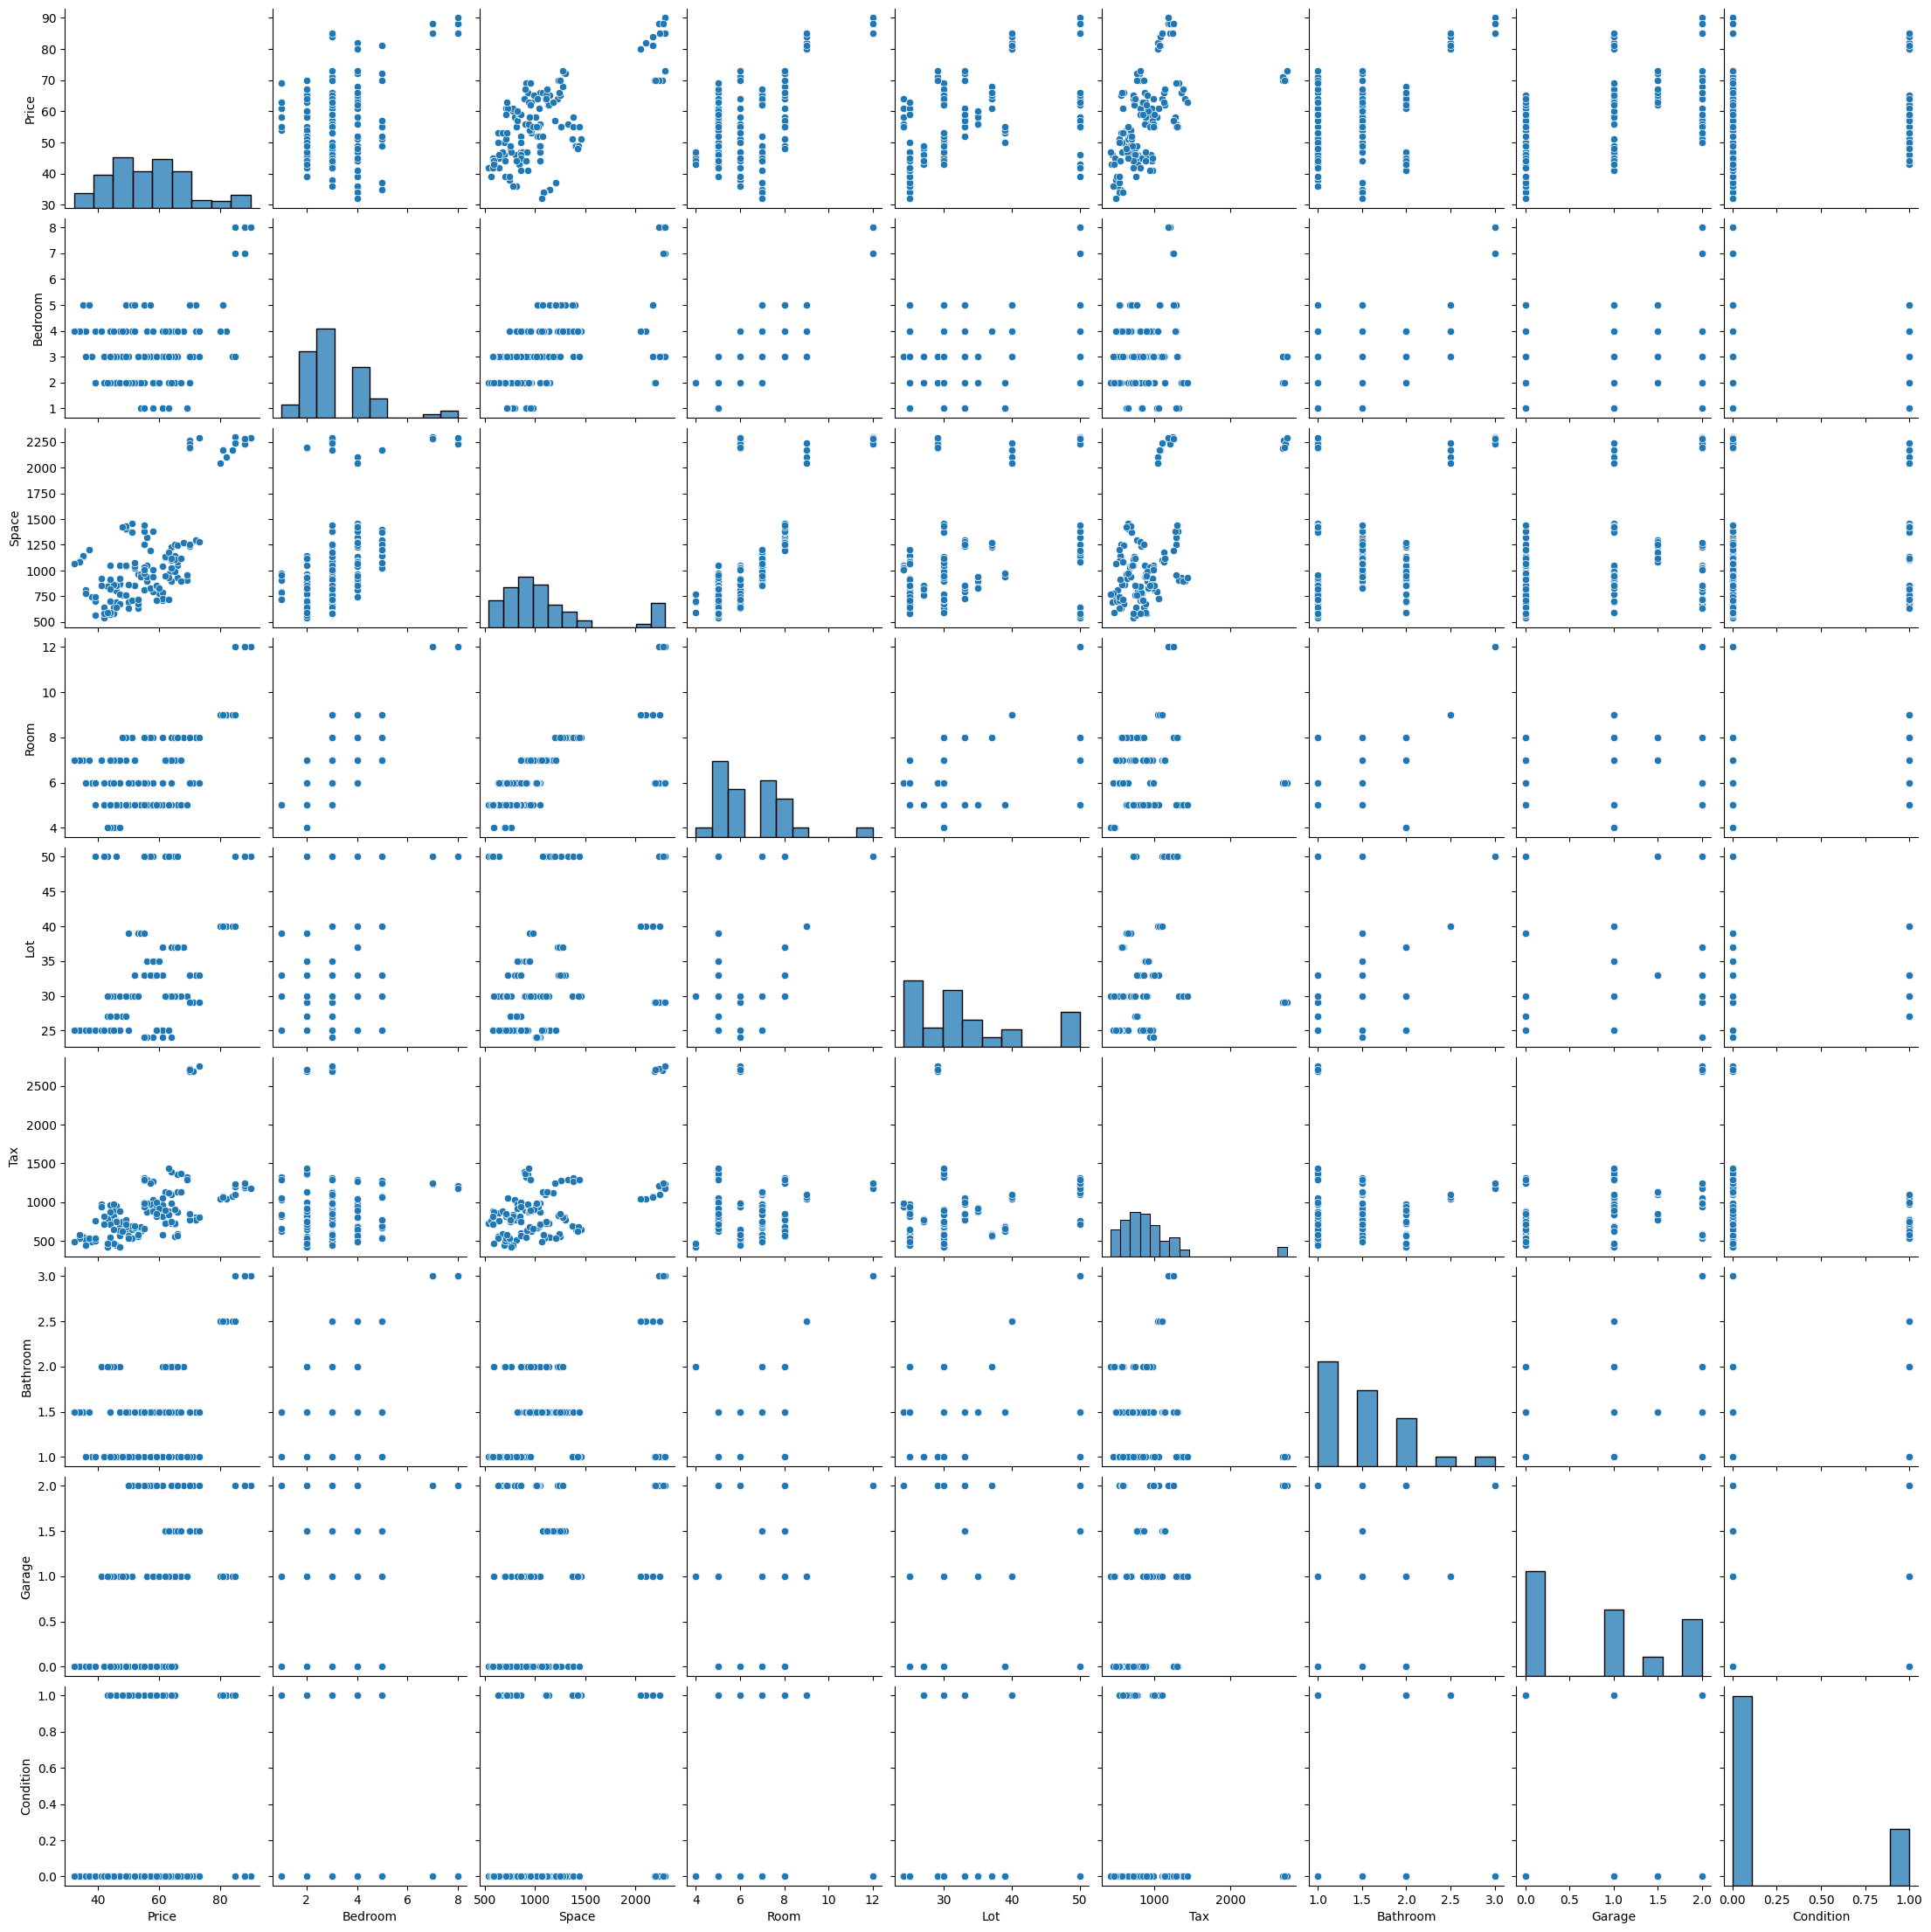

In [4]:
sns.pairplot(data)
plt.show()


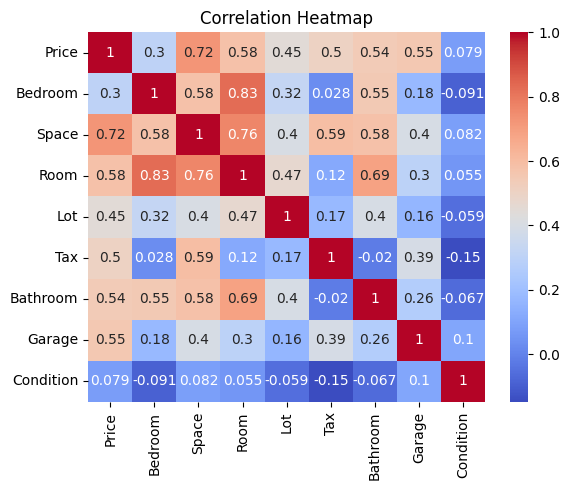

In [5]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
data = pd.get_dummies(data, drop_first=True) 
print(data.columns)

Index(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'],
      dtype='object')


In [10]:
X = data.drop(['Price'], axis=1)
y = data['Price']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)


In [22]:
missing_values = np.isnan(y_train)
if missing_values.any():
    # Remove rows with missing values from both X_train_scaled_imputed and y_train
    X_train_scaled_imputed = X_train_scaled_imputed[~missing_values]
    y_train = y_train[~missing_values]

In [23]:
model = LinearRegression()
model.fit(X_train_scaled_imputed, y_train)


LinearRegression()

In [24]:
y_pred_train = model.predict(X_train_scaled_imputed)
y_pred_test = model.predict(X_test_scaled_imputed)

In [25]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [26]:
print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Training R^2:", train_r2)
print("Test R^2:", test_r2)

Training RMSE: 6.61573981502554
Test RMSE: 8.29792267348478
Training R^2: 0.7324402552032587
Test R^2: 0.5922598760622239
